<img src="datastory.jpg" style="width:100%;height:600px"/>

# <center> House Sale Prices Regressions Exploratary Data Analisys  Report</center>

### Table of contents
- Predict Future Data?
- [Explain and Understand a phenomenon](#id)
- [Test a hypothesis](#id2)
- [Compare two groups](#id3)
- [Dimenshion reduction](#id4)
- [Building a good recommendation system](#id5)
- [Deciding on a course of action or a policy](#id6)


## Inferential Goal(Scientific question of interest)

In [ ]:
# 2-3 rooms to check for a price avarege  and test if there is a statistical significance (2sample t-test)

 ## Model useful or wrong

## Algorithm

In [22]:
import pandas as pd
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Train and Test Data 
train = '/Users/ceo/Desktop/'
traindf=  pd.read_csv(train + 'train.csv') 
traindf.head(10)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000



 ### Tell a story
- Any story has a beginnig, a middle, and an end
- Introduce interesting charachters
- Put them in a predicament
- resolve the predicament
- but leave a room for sequels

In [48]:
traindf['BsmtCond'].fillna(traindf['BsmtCond'].mode()[0], inplace=True)  # filling NaN or missing value
traindf['BsmtExposure'].fillna(traindf['BsmtExposure'].mode()[0], inplace=True) 
traindf['BsmtQual'].fillna(traindf['BsmtQual'].mode()[0], inplace=True) 
traindf['BsmtFinType1'].fillna(traindf['BsmtFinType1'].mode()[0], inplace=True)
traindf['BsmtFinType2'].fillna(traindf['BsmtFinType2'].mode()[0], inplace=True) 
traindf['Electrical'].fillna(traindf['Electrical'].mode()[0], inplace=True) 
traindf['FireplaceQu'].fillna(traindf['FireplaceQu'].mode()[0], inplace=True)  
traindf['GarageArea'].fillna(traindf['GarageArea'].mode()[0], inplace=True) 
traindf['GarageCond'].fillna(traindf['GarageCond'].mode()[0], inplace=True) 
traindf['GarageFinish'].fillna(traindf['GarageFinish'].mode()[0], inplace=True)  
traindf['GarageQual'].fillna(traindf['GarageQual'].mode()[0], inplace=True) 
traindf['GarageType'].fillna(traindf['GarageType'].mode()[0], inplace=True) 
traindf['MasVnrType'].fillna(traindf['MasVnrType'].mode()[0], inplace=True) 

traindf.GarageYrBlt.fillna(traindf.GarageYrBlt.median(),inplace=True)
traindf.LotFrontage.fillna(traindf.LotFrontage.median(),inplace=True)
traindf.MasVnrArea.fillna(traindf.MasVnrArea.median(),inplace=True)

In [8]:
traindf.drop(['Alley'], axis=1, inplace=True)
traindf.drop(['PoolQC'], axis=1, inplace=True)
traindf.drop(['MiscFeature'], axis=1, inplace=True)
traindf.drop(['Fence'], axis=1, inplace=True)

<img src="dataidea.jpg" style="width:50%;height:300px"/>

Let's get started to explore our data and our dataset what we can find interesting from it.

## Exploratory data analysis

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

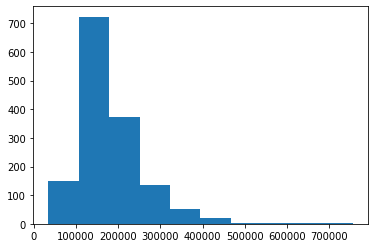

In [10]:
plt.hist(traindf.SalePrice)

Plotting a histogramm of sale prices distribution shows that data  not equally distributed and the data is more dense in between 100000 and 200000.  This distribution has also a number of zeros and too high prices which are either are outliers or missing data. To fix this and to make it more normal to fit a ML model better and accurate, we do a log-transformation of SalePrice, which will cumulate the data and distribute it normally.   

(array([  5.,  12.,  54., 184., 469., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

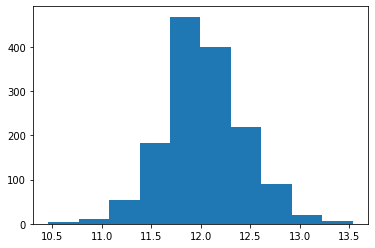

In [9]:
plt.hist(np.log(traindf.SalePrice))

Original plot tells us trends of SalePrices over number of houses. So data tend to radically postitively grow in numbers and to decay  as prices go hihger. To fit our model , not to overfit it, woould be good to normalize our data. For this purpose we do a log-transformation. Now our data looks alomst a normal ditribution and it gives us a good distribution of our data to fit a trained model. 

Let's dive in in more to explore our data better. For example, I want to compare two related quantities or more. I want to visualize it to have an idea of how are correlated the data and what else interesting or facts to notice. Scatterplot is the one of good approaches to try. 

<a id="id"></a>

<Figure size 1440x864 with 0 Axes>

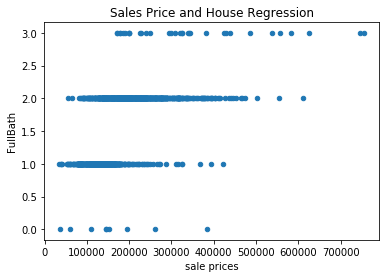

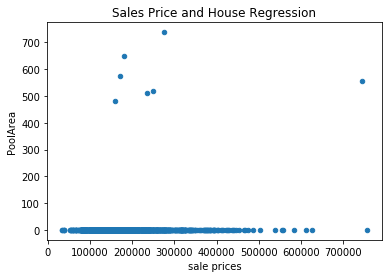

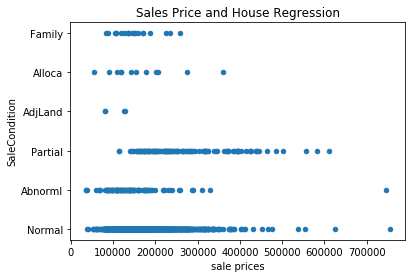

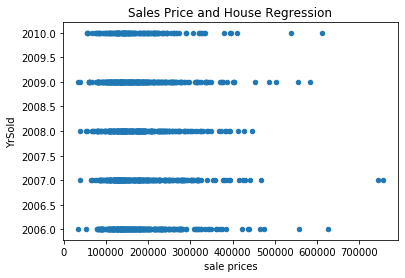

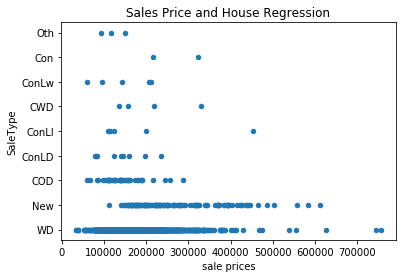

In [30]:
#sns.set_style("darkgrid")
ax = plt.figure(figsize=(20,12))
#ax = traindf.plot.bar(x='BsmtFinType1',
#                    y='TotalBsmtSF')                    
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45,fontsize=14)


#traindf.plot.hist(x='FullBath', y='SalePrice', bins=30)
#df.plot(kind='hist', histtype='step', bins=30, rot=45 ) #; plt.title('ham and spam')
#df.plot(kind='box')
traindf.plot.scatter(x='SalePrice',

                      y='FullBath'

                     ) ;plt.title('Sales Price and House Regression');plt.xlabel('sale prices')
traindf.plot.scatter(x='SalePrice',

                     y='PoolArea'                     

                    ) ;plt.title('Sales Price and House Regression');plt.xlabel('sale prices')

#plt.figure(figsize=(40,10))
plt.style.use('fast')




traindf.plot.scatter(x='SalePrice',

                      y='SaleCondition'

                     ) ;plt.title('Sales Price and House Regression');plt.xlabel('sale prices')
                    
traindf.plot.scatter(x='SalePrice',

                     y='YrSold'                     

                    ) ;plt.title('Sales Price and House Regression');plt.xlabel('sale prices')

                     
traindf.plot.scatter(x='SalePrice',

                     y='SaleType'                     

                    ) ;plt.title('Sales Price and House Regression');plt.xlabel('sale prices')


plt.show()


So.Interesting plots. We have a clear picture of how saleprices change over depending on condition of what we compare. I have an interesting pattern  of what  really impacts  on prices and in what manner. I can tell correlation  and try to predict linear regression  pattern changes . I can spot ouliers  easily  by looking at plots( Dots that are a way far from  majority of data distributions)

In [37]:
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 2000)
#display(combined.isnull().sum())
traindf.BedroomAbvGr

0       3
1       3
2       3
3       3
4       4
5       1
6       3
7       3
8       2
9       2
10      3
11      4
12      2
13      3
14      2
15      2
16      2
17      2
18      3
19      3
20      4
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      2
29      1
30      3
31      3
32      3
33      4
34      2
35      4
36      3
37      3
38      3
39      2
40      3
41      2
42      2
43      3
44      3
45      2
46      1
47      3
48      2
49      3
50      3
51      3
52      2
53      0
54      3
55      3
56      3
57      3
58      3
59      2
60      3
61      3
62      2
63      3
64      3
65      4
66      3
67      3
68      2
69      3
70      3
71      2
72      3
73      3
74      3
75      2
76      2
77      2
78      4
79      2
80      4
81      2
82      3
83      3
84      3
85      4
86      3
87      2
88      2
89      3
90      2
91      2
92      2
93      4
94      3
95      3
96      3
97      3
98      2
99      3


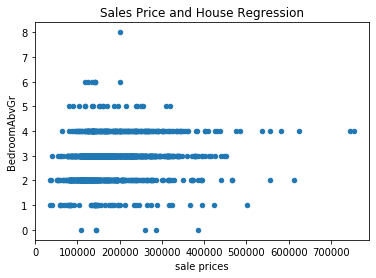

In [39]:
traindf.plot.scatter(x='SalePrice',

                     y='BedroomAbvGr'                     

                    ) ;plt.title('Sales Price and House Regression');plt.xlabel('sale prices')


plt.show()


In [38]:
pd.set_option('display.max_rows', 2000)
traindf.TotRmsAbvGrd

0        8
1        6
2        6
3        7
4        9
5        5
6        7
7        7
8        8
9        5
10       5
11      11
12       4
13       7
14       5
15       5
16       5
17       6
18       6
19       6
20       9
21       6
22       7
23       6
24       6
25       7
26       5
27       7
28       6
29       4
30       6
31       6
32       7
33       6
34       6
35       9
36       6
37       5
38       5
39       6
40       6
41       5
42       5
43       5
44       6
45       6
46       6
47       7
48       8
49       6
50       6
51       6
52       5
53       5
54       6
55       7
56       7
57       7
58      10
59       4
60       5
61       6
62       6
63       9
64       8
65       9
66       7
67       7
68       4
69       7
70       8
71       4
72       7
73       6
74       8
75       5
76       4
77       6
78       8
79       5
80       8
81       5
82       6
83       6
84       7
85       9
86       6
87       4
88       6
89       5
90       4

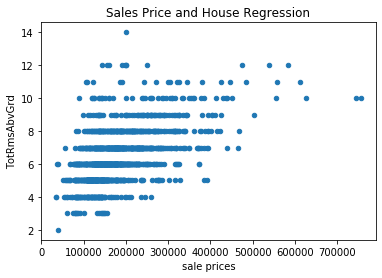

In [40]:
traindf.plot.scatter(x='SalePrice',

                     y='TotRmsAbvGrd'                     

                    ) ;plt.title('Sales Price and House Regression');plt.xlabel('sale prices')


plt.show()


<a id="id2"></a>


## Test a hypothesis


In [ ]:
# 2-3 rooms to check for a price avarege  and test if there is a statistical significance (2sample t-test)

<a id="id3"></a>

## Comparing two groups


<a id="id4"></a>

## Dimenshion reduction

<a id="id5"></a>

## Deciding on a course of action or a policy

<a id="id6"></a>

## Building a good recommendation system

## Conclusion and checking.